In [176]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_s_curve, load_iris, load_wine, fetch_lfw_people
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

In [160]:
X, y = make_s_curve(400)

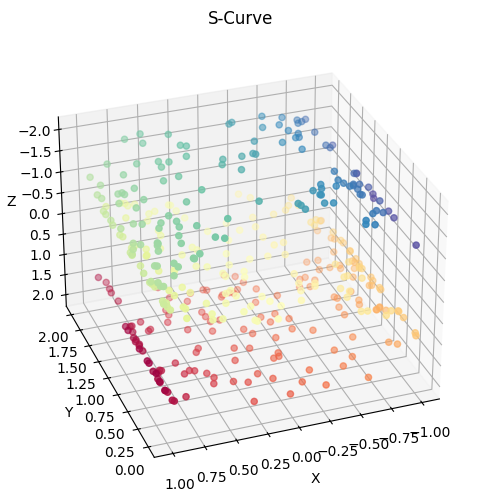

In [161]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
ax.set_title("S-Curve")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [162]:
pca = PCA(n_components=2)
X_red = pca.fit_transform(X)

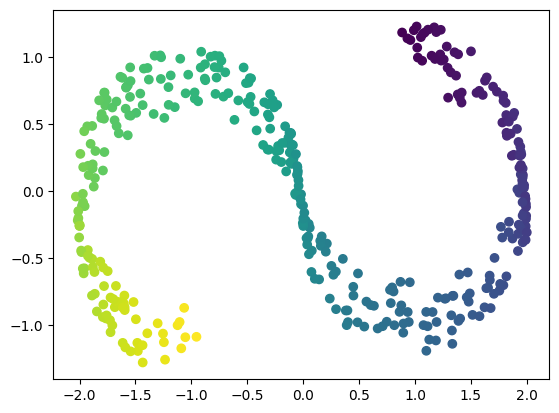

In [163]:
plt.scatter(X_red[:, 0], X_red[:, 1], c=y)

In [164]:
iris = load_iris(as_frame=True)

In [165]:
iris_var = PCA(n_components=2).fit(iris.data)

<Axes: >

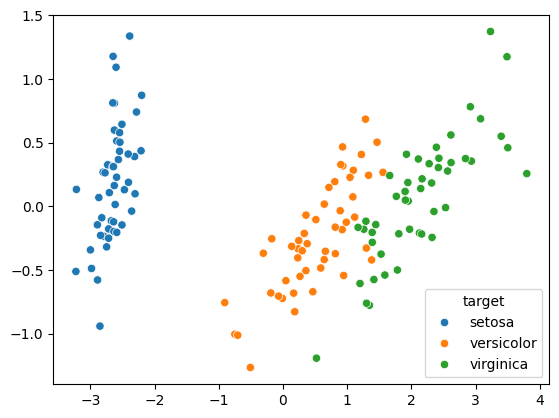

In [166]:
iris_red = iris_var.transform(iris.data)
species = iris.target.map(dict(enumerate(iris.target_names)))
sns.scatterplot(x=iris_red[:, 0], y=iris_red[:, 1], hue=species)

In [167]:
wine = load_wine(as_frame=True)
wine_X = wine.data
wine_y = wine.target
wine_X = StandardScaler().fit_transform(wine_X)
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y)

In [168]:
%%timeit -n 100

clf = LogisticRegression()

clf.fit(wine_X_train, wine_y_train)

3.61 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [169]:
print(clf.score(wine_X_test, wine_y_test))

0.9777777777777777


In [170]:
wine_pca = PCA(n_components=2)
p_wine_X_train = wine_pca.fit_transform(wine_X_train)
p_wine_X_test = wine_pca.fit_transform(wine_X_test)

In [171]:
%%timeit -n 100

clf_pca = LogisticRegression()

clf_pca.fit(p_wine_X_train, wine_y_train)

3.31 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [172]:
print(clf_pca.score(p_wine_X_test, wine_y_test))

0.8888888888888888


In [173]:
lda = LDA(n_components=2)
wine_lda_red = lda.fit_transform(wine_X, wine_y)

<Axes: >

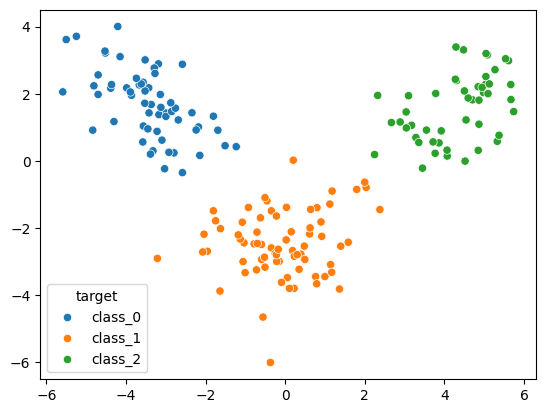

In [174]:
types = wine_y.map(dict(enumerate(wine.target_names)))

sns.scatterplot(x=wine_lda_red[:, 0], y=wine_lda_red[:, 1], hue=types)

<Axes: >

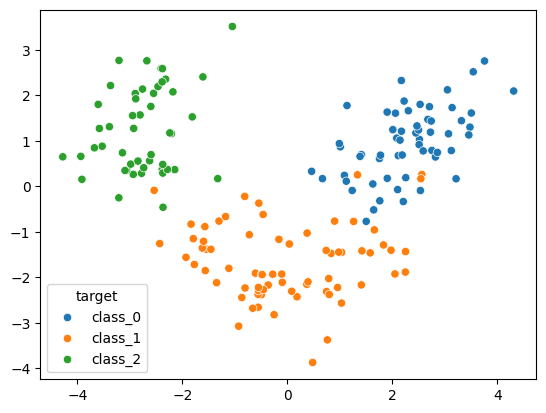

In [175]:
wine_pca = PCA(n_components=2).fit_transform(wine_X, wine_y)

sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=types)

In [177]:
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
lfw_X = lfw.data
lfw_y = lfw.target

In [ ]:
lfw_pca = PCA(n_components=32).fit(lfw_X, lfw_y)

lfw_pca_inv = lfw_pca.inverse_transform(lfw_pca.transform(lfw_X))

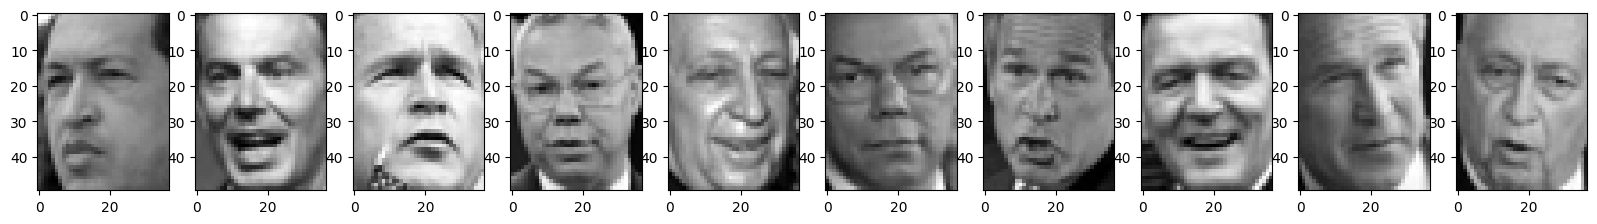

In [182]:
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(lfw_X[i].reshape(50, 37), cmap="gray")

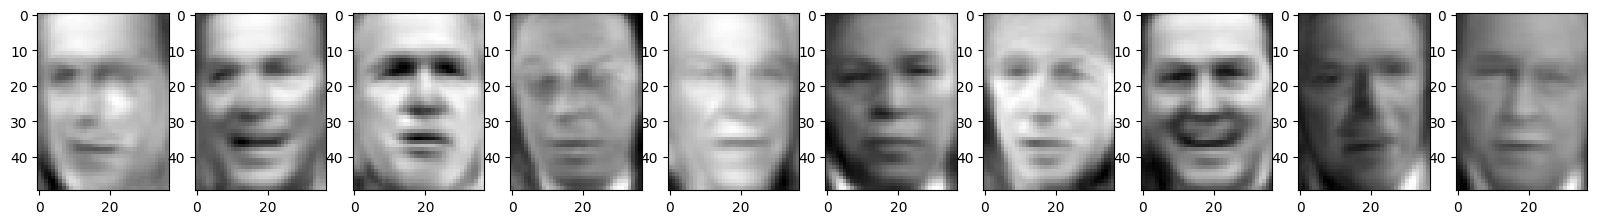

In [183]:
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(lfw_pca_inv[i].reshape(50, 37), cmap="gray")